In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle

In [3]:
#input parameter 
final_p = np.array([-5.37, -0.93])
l =  2.7       #wheel_base
l_f =   0.89    # front_overhang
l_r=   1.1      # rear_overhang
r_min =   4.25   #minimum_turning_radius
w = 1.86         #car_width

lateral Dist 6.640000000000001
G1 to G2 arc length=  6.675884388878311
G3 to G4 arc length=  6.675884388878311
total arc length G1 to G4=  13.351768777756622


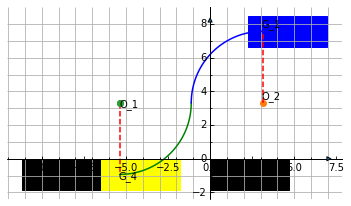

lateral Dist 4.273152361924331
G1 to G2 arc length=  5.476608006790207
G3 to G4 arc length=  5.476608006790207
total arc length G1 to G4=  10.953216013580414


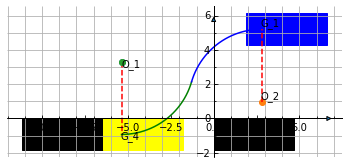

lateral Dist 2.0935225893740386
G1 to G2 arc length=  4.277331624702105
G3 to G4 arc length=  4.277331624702105
total arc length G1 to G4=  8.55466324940421


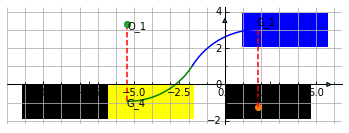

lateral Dist 0.2735195975187522
G1 to G2 arc length=  3.078055242614003
G3 to G4 arc length=  3.078055242614003
total arc length G1 to G4=  6.156110485228006


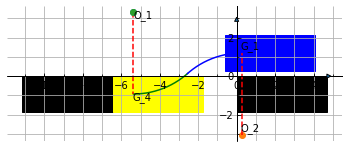

In [9]:
s_1 = np.sqrt((l + l_f)**2 + 2*r_min*w)   
s_0 = s_1 + l_r          # distance between two obstacle
# theta_c = np.arctan(s_1/(r_min-(w/2))) # crash proof angle
# theta_c = np.arctan((l+l_f)/(r_min-(w/2))) # crash proof angle
theta_c = np.arccos((r_min-(w/2))/r_min) +0.05  # crash proof angle


# final_p = np.array([-s_1, -w/2])
o_1 = np.array([final_p[0],final_p[1]+r_min])
# print("distance o_1 to G_1= ",np.linalg.norm(o_1-initial_p))  ## checking r_min == o_1 to G_1

theta_d = np.linspace(0, (np.pi/2)-theta_c, 4)

# print("Reference point starting side = ",o_1)
for theta_d in theta_d:
    
    o_2 = np.array([o_1[0]+2*r_min*np.cos(theta_d), o_1[1]-2*r_min*np.sin(theta_d)])
    #     print(o_2)
    theta = (np.pi/2) - theta_d
    # print(theta)

    initial_p = [o_2[0], o_2[1]+r_min]
    
    lateral = initial_p[1]-(w/2)
    print("lateral Dist", lateral)
    
    first_arc_l = r_min*theta
    print("G1 to G2 arc length= ",first_arc_l)


    print( "G3 to G4 arc length= ",first_arc_l)

    total_arc_l = 2*first_arc_l 

    print("total arc length G1 to G4= ",total_arc_l)
    
    #ploting x and y axis
    fig = plt.figure(figsize=(6, 6))
    ax = SubplotZero(fig, 111)
    fig.add_subplot(ax)
    for direction in ["left", "right", "bottom", "top"]:
        ax.axis[direction].set_visible(False)

    for direction in ["xzero", "yzero"]:
        ax.axis[direction].set_axisline_style("-|>, size=-1")
        ax.axis[direction].set_visible(True)

    ax.add_patch(Rectangle((0, 0), (l+l_f+l_r), -w,color="black"))
    ax.add_patch(Rectangle((-s_0, 0),-(l+l_f+l_r), -w,color="black"))
    ax.add_patch(Rectangle((-s_0, 0), l+l_f+l_r, -w,color="yellow"))
    ax.add_patch(Rectangle((initial_p[0]-l_f, initial_p[1]), l+l_f+l_r, -w/2, color="blue"))
    ax.add_patch(Rectangle((initial_p[0]-l_f, initial_p[1]), l+l_f+l_r, w/2, color="blue"))

    X = np.linspace(-5,5, 200)
    Y = np.linspace(-5, 5, 200)
    x, y = np.meshgrid(X, Y)

    # plot = plt.plot(x, y, ls='none')
    plot = plt.plot(o_1[0], o_1[1], marker='o')             #ploting o_1 center point

    #plot curve
    Angle1 = np.linspace(-(np.pi/2), -(np.pi/2)+theta, 150)

    Gx1 = r_min*np.cos(Angle1) + o_1[0]
    Gy1 = r_min*np.sin(Angle1) + o_1[1]
    plot = plt.plot(Gx1, Gy1, color='g')                               #ploting first curve 

    plot = plt.plot(o_2[0], o_2[1], marker='o')             #ploting o_2 center point

    Angle2 = np.linspace((np.pi/2), (np.pi/2)+theta, 150)
    Gx2 = r_min*np.cos(Angle2) + o_2[0]
    Gy2 = r_min*np.sin(Angle2) + o_2[1]
    plot = plt.plot(Gx2, Gy2, color='b')                               #ploting last curve
    

    rx1 = [o_2[0], initial_p[0]]
    ry1 = [o_2[1], initial_p[1]]
    plot = plt.plot(rx1, ry1, linestyle='--', color='r')

    rx2 = [o_1[0], final_p[0]]
    ry2 = [o_1[1], final_p[1]]
    plot = plt.plot(rx2, ry2, linestyle='--', color='r')


    plt.text(o_1[0]-0.015, o_1[1]-0.25, "O_1")
    plt.text(o_2[0]-0.050, o_2[1]+0.25, "O_2")
    plt.text(initial_p[0]-0.050, initial_p[1]+0.25, "G_1")
    plt.text(final_p[0]-0.050, final_p[1]-0.25, "G_4")

    spacing = 1
    minorLocator = MultipleLocator(spacing)
    ax.plot(o_1[0], o_1[1], marker='o')
    # Set minor tick locations.
    ax.yaxis.set_minor_locator(minorLocator)
    ax.xaxis.set_minor_locator(minorLocator)
    # Set grid to use minor tick locations. 
    ax.grid(which = 'minor')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()